<a href="https://colab.research.google.com/github/Tomokki/Python_Lesson/blob/main/%E7%B7%9A%E5%BD%A2%E5%8D%98%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

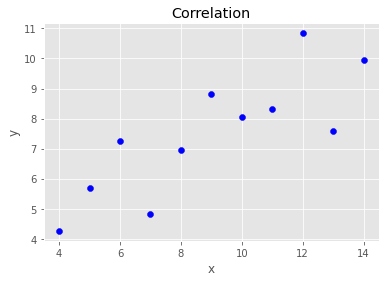

0.81642051634484


In [ ]:
#@title データの可視化と相関係数の確認
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('ggplot')

x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0,
     6.0, 4.0, 12.0, 7.0, 5.0]
y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96,
     7.24, 4.26, 10.84, 4.82, 5.68]

# データの可視化
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'blue')

plt.title('Correlation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 相関係数の確認
s1=pd.Series(x)
s2=pd.Series(y)
res=s1.corr(s2)
print(res)

In [ ]:
#@title 線形単回帰分析
from sklearn.linear_model import LinearRegression

# 線形単回帰モデルの生成
x = np.array(x).reshape(-1,1) # n行1列に変形
y = np.array(y)
model = LinearRegression()
model.fit(x, y)

print('intercept = ', model.intercept_)  # 切片
print('coefficient = ', model.coef_[0]) # 傾き

intercept =  3.0000909090909094
coefficient =  0.5000909090909093


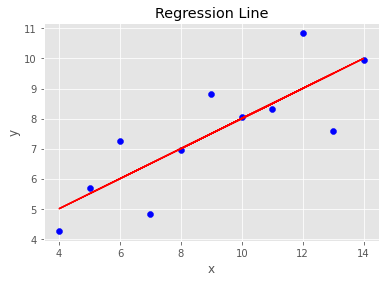

13.001909090909095


In [ ]:
#@title 線形単回帰モデルの可視化
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('ggplot')

fig, ax = plt.subplots()
ax.scatter(x, y, color = 'blue')

plt.plot(x, model.predict(x), color = 'red')
plt.title('Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# x=20に対する予測結果
x_20 = np.array(20).reshape(-1,1)
y_pred = model.predict(x_20)
print(y_pred[0])

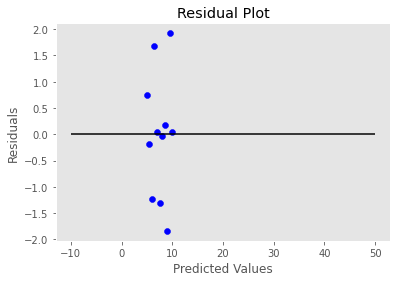

MSE:  1.2511536363636366
r^2:  0.6665424595087748


In [ ]:
#@title 線形単回帰分析の性能評価

# 残差プロット
y_pred = model.predict(x)
plt.scatter(y_pred, y_pred - y,
            color = 'blue')
plt.hlines(y = 0, xmin = -10,
           xmax = 50, color = 'black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# 平均二乗誤差（Mean Square Error）
from sklearn.metrics import mean_squared_error
print('MSE: ', mean_squared_error(y, y_pred))

# 決定係数（Mean Square Error）
from sklearn.metrics import r2_score
print('r^2: ', r2_score(y, y_pred))

In [ ]:
import pandas as pd

boston_df = pd.read_excel('boston_clean.xlsx')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#@title housing
import pandas as pd

boston_df = pd.read_excel('boston_clean.xlsx')
boston_df.head()

import matplotlib.pyplot as plt
# 平均部屋数と住宅価格の散布図をプロット
plt.scatter(boston_df['RM'],
            boston_df['MEDV'])
plt.title('Scatter Plot of RM vs MEDV')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Prices in $1000\'s [MEDV]')
plt.grid()
plt.show()

print(boston_df[['RM','MEDV']].corr())

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 説明変数（Numpyの配列）
X = boston_df[['RM']].values
# 目的変数（Numpyの配列）
Y = boston_df['MEDV'].values
# 線形モデルの重みを学習
lr.fit(X, Y)

print('intercept = ', lr.intercept_)
print('coefficient = ', lr.coef_[0])

plt.scatter(X, Y, color = 'blue')
plt.plot(X, lr.predict(X), color = 'red')
plt.title('Regression Line')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Prices in $1000\'s [MEDV]')
plt.grid()
plt.show()

# x=10に対する予測結果
x_10 = np.array(10).reshape(-1,1)
y_pred = lr.predict(x_10)
print(y_pred[0])

# データを学習用と検証用に分割
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size = 0.7, test_size = 0.3, random_state = 0)

lr = LinearRegression()
# 線形モデルの重みを学習
lr.fit(X_train, Y_train)
# 検証データを用いて目的変数を予測
Y_pred = lr.predict(X_test)

plt.scatter(Y_pred, Y_pred - Y_test,
            color = 'blue')
plt.hlines(y = 0, xmin = -10, xmax = 50,
           color = 'black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error
# 学習データに対する目的変数を予測
Y_train_pred = lr.predict(X_train)
# 学習データを用いたときの平均二乗誤差を出力
print('MSE train data: ',
      mean_squared_error(Y_train, Y_train_pred))
# 検証データを用いたときの平均二乗誤差を出力
print('MSE test data: ',
      mean_squared_error(Y_test, Y_pred))

from sklearn.metrics import r2_score
print('r^2 train data: ', r2_score(Y_train, Y_train_pred))
print('r^2 test data: ', r2_score(Y_test, Y_pred))

NameError: ignored

In [ ]:
#@title ice coffee

# データセットの読み込み
import pandas as pd
coffee_df = pd.read_csv("icecoffee.csv")
print(coffee_df.head())

# 気温とアイスコーヒーの販売数の散布図をプロット
import matplotlib.pyplot as plt
plt.scatter(coffee_df['temperature'],
            coffee_df['icecoffee'])
plt.title('Scatter Plot of temperature vs icecoffee')
plt.xlabel('Outside temperature [temperature]')
plt.ylabel('# of icecoffee [icecoffee]')
plt.grid()
plt.show()

print(coffee_df[['temperature','icecoffee']].corr())

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 説明変数（Numpyの配列）
X = coffee_df[['temperature']].values
# 目的変数（Numpyの配列）
Y = coffee_df['icecoffee'].values
# 線形モデルの重みを学習
lr.fit(X, Y)

print('intercept = ', lr.intercept_)
print('coefficient = ', lr.coef_[0])

plt.scatter(X, Y, color = 'blue')
plt.plot(X, lr.predict(X), color = 'red')
plt.title('Regression Line')
plt.xlabel('Outside temperature [temperature]')
plt.ylabel('# of icecoffee [icecoffee]')
plt.grid()
plt.show()

# x=38に対する予測結果
x_38 = np.array(38).reshape(-1,1)
y_pred = lr.predict(x_38)
print(y_pred[0])

# 残差プロット
Y_pred = lr.predict(X)
plt.scatter(Y_pred, Y_pred - Y,
            color = 'blue')
plt.hlines(y = 0, xmin = 50,
           xmax = 100, color = 'black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# 平均二乗誤差（Mean Square Error）
from sklearn.metrics import mean_squared_error
print('MSE: ', mean_squared_error(Y, Y_pred))

# 決定係数（Mean Square Error）
from sklearn.metrics import r2_score
print('r^2: ', r2_score(Y, Y_pred))

   year  expenditure_billion
0  1962                 52.3
1  1963                 53.4
2  1964                 54.7
3  1965                 50.6
4  1966                 58.1


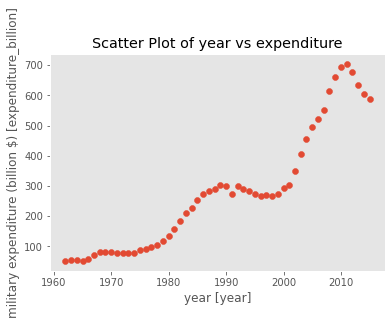

                         year  expenditure_billion
year                 1.000000             0.937193
expenditure_billion  0.937193             1.000000
intercept =  -23434.728079537515
coefficient =  11.925385934819898


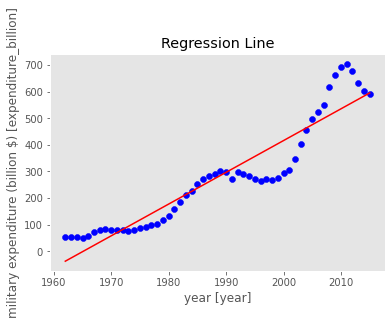

606.8499650593985
618.7753509942195
630.7007369290404


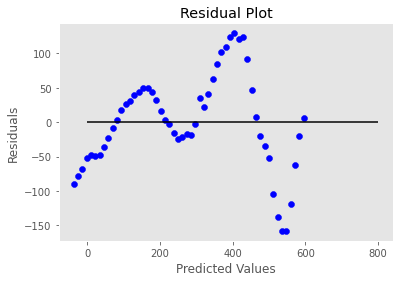

MSE:  4785.46854256518
r^2:  0.8783308672132176


In [ ]:
#@title military

# データセットの読み込み
import pandas as pd
military_df = pd.read_csv("military_expenditures.csv")
print(military_df.head())

# 年と支出の散布図をプロット
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('ggplot')
plt.scatter(military_df['year'],
            military_df['expenditure_billion'])
plt.title('Scatter Plot of year vs expenditure')
plt.xlabel('year [year]')
plt.ylabel('military expenditure (billion $) [expenditure_billion]')
plt.grid()
plt.show()

print(military_df[['year','expenditure_billion']].corr())

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 説明変数（Numpyの配列）
X = military_df[['year']].values
# 目的変数（Numpyの配列）
Y = military_df['expenditure_billion'].values
# 線形モデルの重みを学習
lr.fit(X, Y)

print('intercept = ', lr.intercept_)
print('coefficient = ', lr.coef_[0])

plt.scatter(X, Y, color = 'blue')
plt.plot(X, lr.predict(X), color = 'red')
plt.title('Regression Line')
plt.xlabel('year [year]')
plt.ylabel('military expenditure (billion $) [expenditure_billion]')
plt.grid()
plt.show()

# x=2016に対する予測結果
import numpy as np
x_2016 = np.array(2016).reshape(-1,1)
y_pred = lr.predict(x_2016)
print(y_pred[0])
# x=2017に対する予測結果
x_2017 = np.array(2017).reshape(-1,1)
y_pred = lr.predict(x_2017)
print(y_pred[0])
# x=2018に対する予測結果
x_2018 = np.array(2018).reshape(-1,1)
y_pred = lr.predict(x_2018)
print(y_pred[0])

# 残差プロット
Y_pred = lr.predict(X)
plt.scatter(Y_pred, Y_pred - Y,
            color = 'blue')
plt.hlines(y = 0, xmin = 0,
           xmax = 800, color = 'black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# 平均二乗誤差（Mean Square Error）
from sklearn.metrics import mean_squared_error
print('MSE: ', mean_squared_error(Y, Y_pred))

# 決定係数（Mean Square Error）
from sklearn.metrics import r2_score
print('r^2: ', r2_score(Y, Y_pred))

In [ ]:
#@title mammals

import pandas as pd
# データセットの読み込み
mammals_df = pd.read_csv("sleep_in_mammals.csv")
print(mammals_df.head())
print(mammals_df.isnull().sum())

# データクレンジング
mammals_df = mammals_df.fillna(mammals_df.mean())
print(mammals_df.head())
print(mammals_df.isnull().sum())

import matplotlib.pyplot as plt
# 妊娠期間と寿命の散布図をプロット
plt.scatter(mammals_df['Gestation'],
            mammals_df['LifeSpan'])
plt.title('Scatter Plot of Gestation vs LifeSpan')
plt.xlabel('Gestation time (days) [Gestation]')
plt.ylabel('Life span (years) [LifeSpan]')
plt.grid()
plt.show()

print(mammals_df[['Gestation', 'LifeSpan']].corr())

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 説明変数（Numpyの配列）
X = mammals_df[['Gestation']].values
# 目的変数（Numpyの配列）
Y = mammals_df['LifeSpan'].values
# 線形モデルの重みを学習
lr.fit(X, Y)

print('intercept = ', lr.intercept_)
print('coefficient = ', lr.coef_[0])

plt.scatter(X, Y, color = 'blue')
plt.plot(X, lr.predict(X), color = 'red')
plt.title('Regression Line')
plt.xlabel('Gestation time (days) [Gestation]')
plt.ylabel('Life span (years) [LifeSpan]')
plt.grid()
plt.show()

# x=10に対する予測結果
x_10 = np.array(10).reshape(-1,1)
y_pred = lr.predict(x_10)
print(y_pred[0])

# データを学習用と検証用に分割
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size = 0.7, test_size = 0.3, random_state = 0)

lr = LinearRegression()
# 線形モデルの重みを学習
lr.fit(X_train, Y_train)
# 検証データを用いて目的変数を予測
Y_pred = lr.predict(X_test)

plt.scatter(Y_pred, Y_pred - Y_test,
            color = 'blue')
plt.hlines(y = 0, xmin = 0, xmax = 100,
           color = 'black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error
# 学習データに対する目的変数を予測
Y_train_pred = lr.predict(X_train)
# 学習データを用いたときの平均二乗誤差を出力
print('MSE train data: ',
      mean_squared_error(Y_train, Y_train_pred))
# 検証データを用いたときの平均二乗誤差を出力
print('MSE test data: ',
      mean_squared_error(Y_test, Y_pred))

from sklearn.metrics import r2_score
print('r^2 train data: ', r2_score(Y_train, Y_train_pred))
print('r^2 test data: ', r2_score(Y_test, Y_pred))

  Sex  Length  Diameter  Height   Whole  Shucked  Viscera  Shell  Rings
0   M   0.455     0.365   0.095  0.5140   0.2245   0.1010  0.150     15
1   M   0.350     0.265   0.090  0.2255   0.0995   0.0485  0.070      7
2   F   0.530     0.420   0.135  0.6770   0.2565   0.1415  0.210      9
3   M   0.440     0.365   0.125  0.5160   0.2155   0.1140  0.155     10
4   I   0.330     0.255   0.080  0.2050   0.0895   0.0395  0.055      7


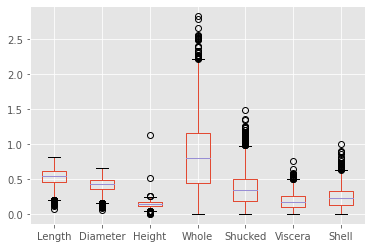

intercept =  2.403657394763415
coefficient =  18.46060795802206


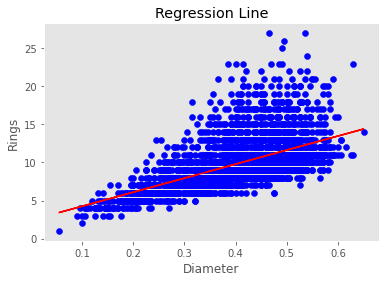

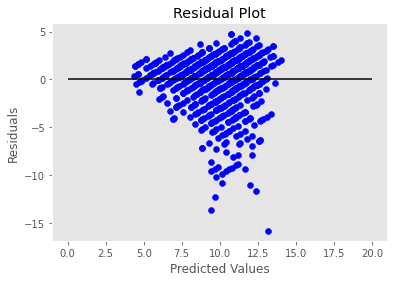

MSE train data:  7.055512846427162
MSE test data:  6.678375900161204
r^2 train data:  0.3183621355462084
r^2 test data:  0.3644499417802157


In [ ]:
#@title abalone
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('ggplot')
import seaborn as sns

abalone_data = pd.read_csv("abalone.csv", header=None, sep=',')
abalone_data.columns=['Sex','Length','Diameter','Height','Whole','Shucked','Viscera','Shell','Rings']
print(abalone_data.head())

# 箱ひげ図として表示する列を指定
abalone_data[['Length','Diameter','Height','Whole','Shucked','Viscera','Shell']].boxplot()

# グリッドを表示する
plt.grid(True)
plt.show()

abalone_data.describe()

# 線形回帰モデル
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#X = abalone_data.iloc[:,1:7]
X = abalone_data['Diameter']
Y = abalone_data['Rings']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0)

X_train = np.array(X_train).reshape(-1,1) # n行1列に変形
X_test = np.array(X_test).reshape(-1,1) # n行1列に変形

lr = LinearRegression()
# 線形モデルの重みを学習
lr.fit(X_train, Y_train)

print('intercept = ', lr.intercept_)
print('coefficient = ', lr.coef_[0])

plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Regression Line')
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.grid()
plt.show()

# 検証データを用いて目的変数を予測
Y_pred = lr.predict(X_test)

plt.scatter(Y_pred, Y_pred - Y_test,
            color = 'blue')
plt.hlines(y = 0, xmin = 0, xmax = 20,
           color = 'black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

from sklearn.metrics import mean_squared_error
# 学習データに対する目的変数を予測
Y_train_pred = lr.predict(X_train)
# 学習データを用いたときの平均二乗誤差を出力
print('MSE train data: ',
      mean_squared_error(Y_train, Y_train_pred))
# 検証データを用いたときの平均二乗誤差を出力
print('MSE test data: ',
      mean_squared_error(Y_test, Y_pred))

from sklearn.metrics import r2_score
print('r^2 train data: ', r2_score(Y_train, Y_train_pred))
print('r^2 test data: ', r2_score(Y_test, Y_pred))